In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.close("all")

In [3]:
products = pd.read_csv(
    'D:/University of Cincinnati/Fall 2022/Cloud Computing/final/8451_The_Complete_Journey_2_Sample/400_products.csv').rename(columns=lambda x: x.strip())
households = pd.read_csv(
    'D:/University of Cincinnati/Fall 2022/Cloud Computing/final/8451_The_Complete_Journey_2_Sample/400_households.csv').rename(columns=lambda x: x.strip())
transactions = pd.read_csv(
    'D:/University of Cincinnati/Fall 2022/Cloud Computing/final/8451_The_Complete_Journey_2_Sample/400_transactions.csv').rename(columns=lambda x: x.strip())


joined = transactions.join(products, on='PRODUCT_NUM', how='left', rsuffix='_prd').join(households, on='HSHD_NUM', how='left', rsuffix='_prd')
joined = joined[['HSHD_NUM', 'L', 'AGE_RANGE', 'MARITAL', 'INCOME_RANGE', 'HOMEOWNER', 'HSHD_COMPOSITION', 'HH_SIZE', 'CHILDREN', 'BASKET_NUM', 'PURCHASE_', 'PRODUCT_NUM', 'SPEND', 'UNITS','STORE_R', 'WEEK_NUM', 'YEAR','DEPARTMENT','COMMODITY', 'BRAND_TY', 'NATURAL_ORGANIC_FLAG']]
joined = joined.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [17]:
joined['CUMSPEND'] = joined.apply(lambda row: row['SPEND']*row['UNITS'], axis=1)


<BarContainer object of 728 artists>

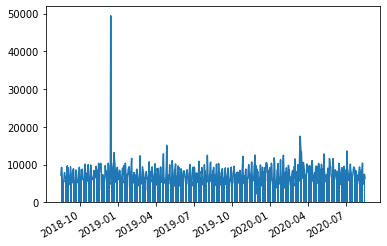

In [21]:
spends = joined.groupby('PURCHASE_')['CUMSPEND'].sum().tolist()
dates = pd.date_range(start="2018-08-17", end='2020-08-15', periods=728)
ts = pd.Series(spends, index=dates)
# ts = ts.cumsum()
ts.plot().bar(dates, spends)


<BarContainer object of 7 artists>

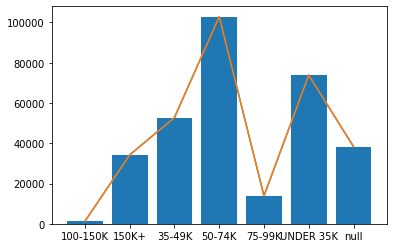

In [20]:
grouped = joined.groupby('INCOME_RANGE')['CUMSPEND']
spends = grouped.sum().tolist()
dates = grouped.groups.keys()
ts = pd.Series(spends, index=dates)
ts.plot()
ts.plot().bar(dates, spends)


In [ ]:
# growing shrinking categories
spends = joined.groupby('PURCHASE_')['COMMODITIES'].sum().tolist()
dates = pd.date_range(start="2018-08-17", end='2020-08-15', periods=728)
ts = pd.Series(spends, index=dates)
# ts = ts.cumsum()
ts.plot().bar(dates, spends)